In [1]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore') 

In [3]:
df=pd.read_csv('heart.csv')

In [4]:
df1 = df.copy(deep=True)

In [5]:
df1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
df1.shape

(918, 12)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [8]:
df1_categorical = df1.select_dtypes(include='object')  
df1_numerical = df1.select_dtypes(exclude='object')

In [9]:
df1_numerical.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,140,289,0,172,0.0,0
1,49,160,180,0,156,1.0,1
2,37,130,283,0,98,0.0,0
3,48,138,214,0,108,1.5,1
4,54,150,195,0,122,0.0,0


In [10]:
df1_categorical.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up


In [11]:
for column in df1_categorical:
    print(f'{column}: {df1_categorical[column].unique()}')

Sex: ['M' 'F']
ChestPainType: ['ATA' 'NAP' 'ASY' 'TA']
RestingECG: ['Normal' 'ST' 'LVH']
ExerciseAngina: ['N' 'Y']
ST_Slope: ['Up' 'Flat' 'Down']


In [12]:
df1.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [13]:
df1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [14]:
# Map text to 1/0 and do some cleaning
df1[['Sex']] = df1[['Sex']].replace(to_replace={'M':1,'F':0})
df1[['ExerciseAngina']] = df1[['ExerciseAngina']].replace(to_replace={'Y':1,'N':0})

In [15]:
pd.set_option('display.max_columns', None)
df1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,0,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,0,1.0,Flat,1
2,37,1,ATA,130,283,0,ST,98,0,0.0,Up,0
3,48,0,ASY,138,214,0,Normal,108,1,1.5,Flat,1
4,54,1,NAP,150,195,0,Normal,122,0,0.0,Up,0


In [16]:
df1 = pd.get_dummies(data=df1, columns=['ChestPainType','RestingECG','ExerciseAngina','ST_Slope'],drop_first=True)

In [17]:
df1.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_1,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0.0,0,1,0,0,1,0,0,0,1
1,49,0,160,180,0,156,1.0,1,0,1,0,1,0,0,1,0
2,37,1,130,283,0,98,0.0,0,1,0,0,0,1,0,0,1
3,48,0,138,214,0,108,1.5,1,0,0,0,1,0,1,1,0
4,54,1,150,195,0,122,0.0,0,0,1,0,1,0,0,0,1


In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   Sex                918 non-null    int64  
 2   RestingBP          918 non-null    int64  
 3   Cholesterol        918 non-null    int64  
 4   FastingBS          918 non-null    int64  
 5   MaxHR              918 non-null    int64  
 6   Oldpeak            918 non-null    float64
 7   HeartDisease       918 non-null    int64  
 8   ChestPainType_ATA  918 non-null    uint8  
 9   ChestPainType_NAP  918 non-null    uint8  
 10  ChestPainType_TA   918 non-null    uint8  
 11  RestingECG_Normal  918 non-null    uint8  
 12  RestingECG_ST      918 non-null    uint8  
 13  ExerciseAngina_1   918 non-null    uint8  
 14  ST_Slope_Flat      918 non-null    uint8  
 15  ST_Slope_Up        918 non-null    uint8  
dtypes: float64(1), int64(7), u

<AxesSubplot:>

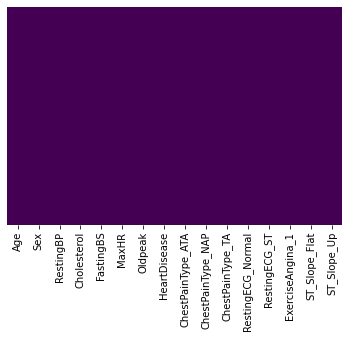

In [19]:
sns.heatmap(df1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [20]:
df1.isnull().sum()* 100 / len(df) #% null values in columns

Age                  0.0
Sex                  0.0
RestingBP            0.0
Cholesterol          0.0
FastingBS            0.0
MaxHR                0.0
Oldpeak              0.0
HeartDisease         0.0
ChestPainType_ATA    0.0
ChestPainType_NAP    0.0
ChestPainType_TA     0.0
RestingECG_Normal    0.0
RestingECG_ST        0.0
ExerciseAngina_1     0.0
ST_Slope_Flat        0.0
ST_Slope_Up          0.0
dtype: float64

(-1.1269714722318838,
 1.2036208505930543,
 -1.2344071166978259,
 1.2116273321757016)

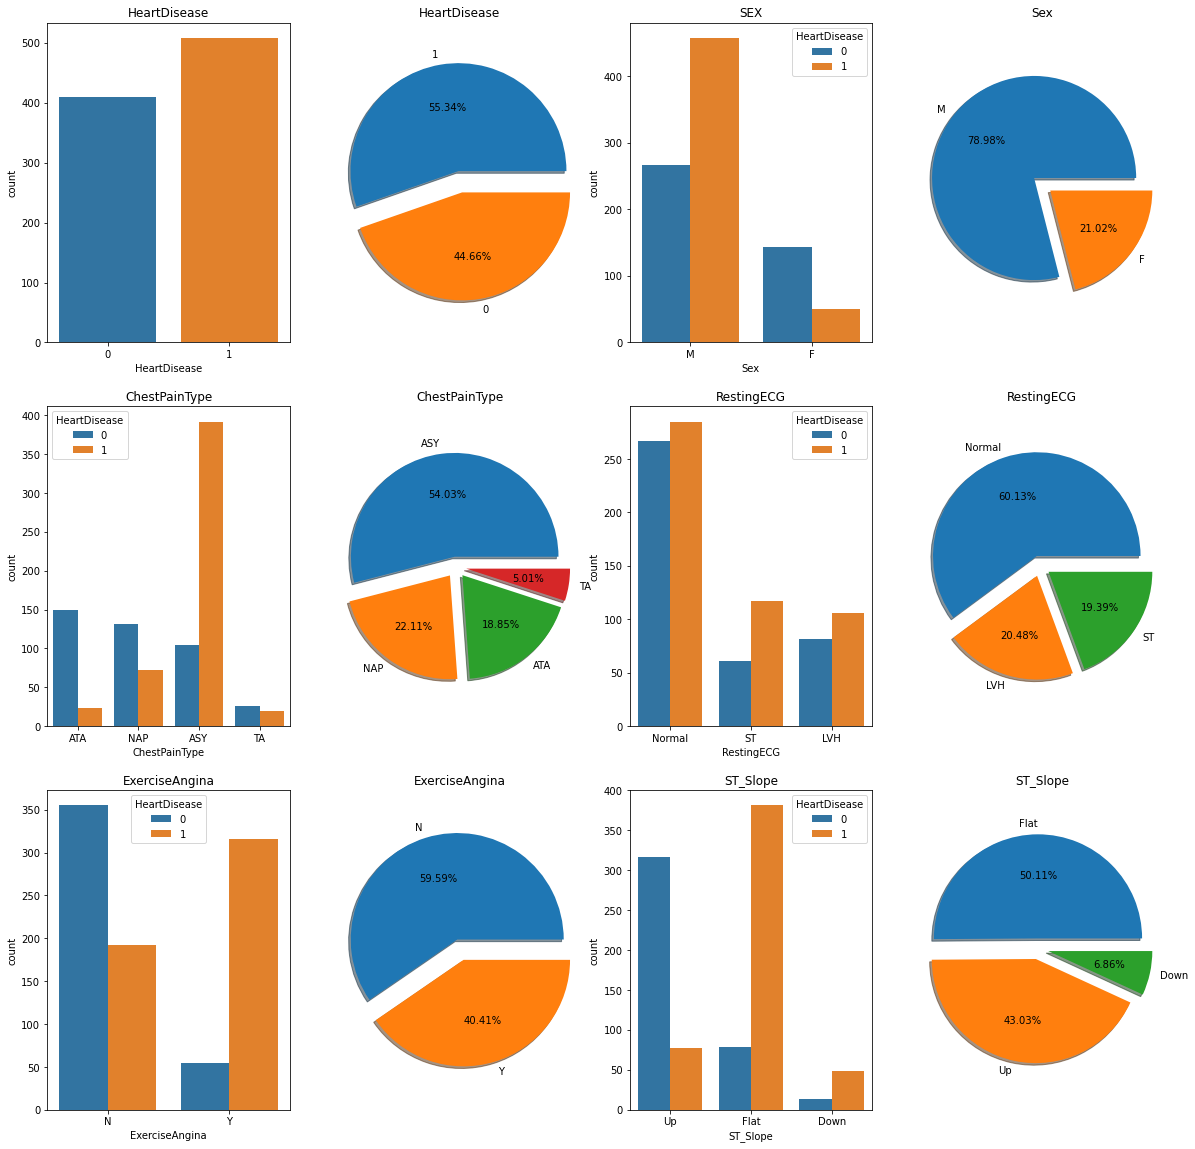

In [21]:
plt.figure(figsize=(20,20))

plt.subplot(3,4,1)
sns.countplot(df.HeartDisease)
plt.title('HeartDisease') 
plt.subplot(3,4,2)
HeartDisease = df.HeartDisease.value_counts()
plt.pie(HeartDisease,explode=[0.1,0.1],autopct='%0.2f%%',shadow=True,labels=HeartDisease.index)
plt.title('HeartDisease')
plt.axis('equal')

plt.subplot(3,4,3)
sns.countplot(df.Sex,hue=df.HeartDisease)
plt.title('SEX') 
plt.subplot(3,4,4)
sex = df.Sex.value_counts()
plt.pie(sex,explode=[0.1,0.1],autopct='%0.2f%%',shadow=True,labels=sex.index)
plt.title('Sex')
plt.axis('equal')


plt.subplot(3,4,5)
sns.countplot(df.ChestPainType,hue=df.HeartDisease)
plt.title('ChestPainType') 
plt.subplot(3,4,6)
ChestPainType = df.ChestPainType.value_counts()
plt.pie(ChestPainType,explode=[0.1,0.1,0.1,0.1],autopct='%0.2f%%',shadow=True,labels=ChestPainType.index)
plt.title('ChestPainType')
plt.axis('equal')

plt.subplot(3,4,7)
sns.countplot(df.RestingECG,hue=df.HeartDisease)
plt.title('RestingECG') 
plt.subplot(3,4,8)
RestingECG = df.RestingECG.value_counts()
plt.pie(RestingECG,explode=[0.1,0.1,0.1],autopct='%0.2f%%',shadow=True,labels=RestingECG.index)
plt.title('RestingECG')
plt.axis('equal')

plt.subplot(3,4,9)
sns.countplot(df.ExerciseAngina,hue=df.HeartDisease)
plt.title('ExerciseAngina') 
plt.subplot(3,4,10)
ExerciseAngina = df.ExerciseAngina.value_counts()
plt.pie(ExerciseAngina,explode=[0.1,0.1],autopct='%0.2f%%',shadow=True,labels=ExerciseAngina.index)
plt.title('ExerciseAngina')
plt.axis('equal')

plt.subplot(3,4,11)
sns.countplot(df.ST_Slope,hue=df.HeartDisease)
plt.title('ST_Slope') 
plt.subplot(3,4,12)
ST_Slope = df.ST_Slope.value_counts()
plt.pie(ST_Slope,explode=[0.1,0.1,0.1],autopct='%0.2f%%',shadow=True,labels=ST_Slope.index)
plt.title('ST_Slope')
plt.axis('equal')

In [22]:
df1_numerical.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,140,289,0,172,0.0,0
1,49,160,180,0,156,1.0,1
2,37,130,283,0,98,0.0,0
3,48,138,214,0,108,1.5,1
4,54,150,195,0,122,0.0,0


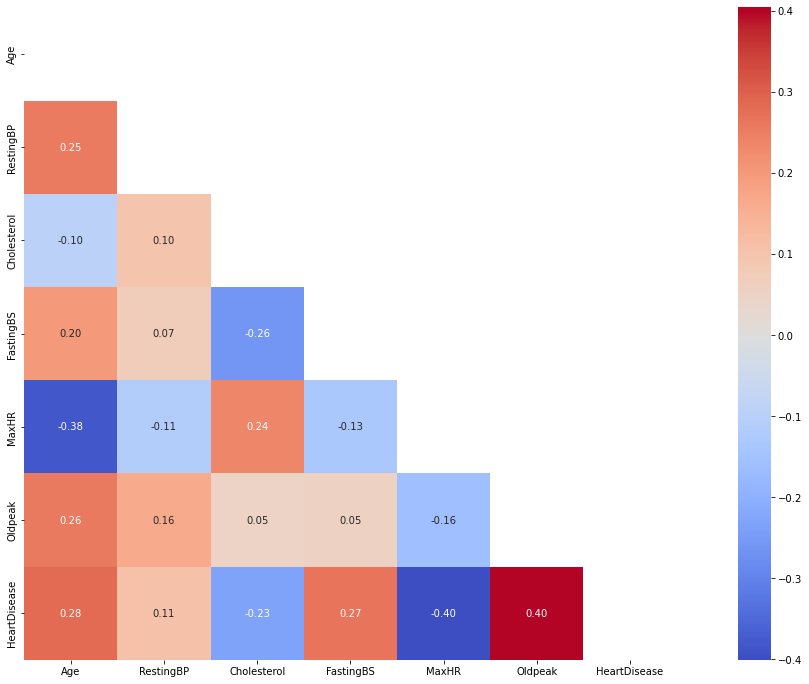

In [23]:
matrix = df.corr()
mask = np.triu(np.ones_like(matrix,dtype='bool'))

plt.figure(figsize=(22,12))
sns.heatmap(matrix,mask=mask,annot=True,center=0,fmt='.2f',square=True,cmap="coolwarm")
plt.show()

In [24]:
df1_numerical.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,140,289,0,172,0.0,0
1,49,160,180,0,156,1.0,1
2,37,130,283,0,98,0.0,0
3,48,138,214,0,108,1.5,1
4,54,150,195,0,122,0.0,0


In [25]:
X = df1.drop(columns=['HeartDisease'])

In [26]:
X.columns

Index(['Age', 'Sex', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR',
       'Oldpeak', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_1',
       'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [27]:
y = df1['HeartDisease']
y.shape

(918,)

In [28]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

Model Name:  LogisticRegression()
Confusion matrix : 
 [[91 16]
 [11 66]]
Outcome values : 
 91 16 11 66
Classification report : 
               precision    recall  f1-score   support

           1       0.89      0.85      0.87       107
           0       0.80      0.86      0.83        77

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.86      0.85      0.85       184

Accuracy : 85.3 %
Precision : 89.2 %
Recall : 85.0 %
F1 Score : 0.871
Specificity or True Negative Rate : 85.7 %
Balanced Accuracy : 85.3 %
roc_auc_score: 0.854


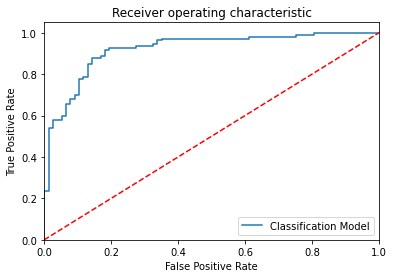

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[92 15]
 [14 63]]
Outcome values : 
 92 15 14 63
Classification report : 
               precision    recall  f1-score   support

           1       0.87      0.86      0.86       107
           0       0.81      0.82      0.81        77

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184

Accuracy : 84.2 %
Precision : 86.8 %
Recall : 86.0 %
F1 Score : 0.864
Specificity or True Negative Rate : 81.8 %
Balanced Accuracy : 83.9 %
roc_auc_score: 0.839


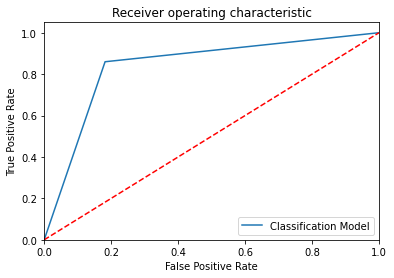

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[94 13]
 [12 65]]
Outcome values : 
 94 13 12 65
Classification report : 
               precision    recall  f1-score   support

           1       0.89      0.88      0.88       107
           0       0.83      0.84      0.84        77

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184

Accuracy : 86.4 %
Precision : 88.7 %
Recall : 87.9 %
F1 Score : 0.883
Specificity or True Negative Rate : 84.4 %
Balanced Accuracy : 86.1 %
roc_auc_score: 0.861


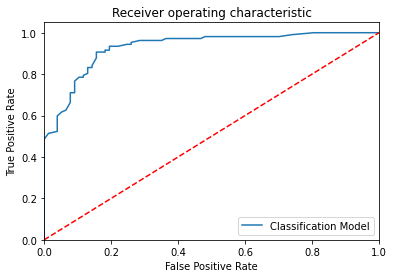

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[90 17]
 [11 66]]
Outcome values : 
 90 17 11 66
Classification report : 
               precision    recall  f1-score   support

           1       0.89      0.84      0.87       107
           0       0.80      0.86      0.82        77

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184

Accuracy : 84.8 %
Precision : 89.1 %
Recall : 84.1 %
F1 Score : 0.865
Specificity or True Negative Rate : 85.7 %
Balanced Accuracy : 84.9 %
roc_auc_score: 0.849


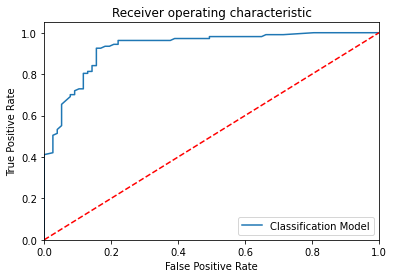

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[75 32]
 [22 55]]
Outcome values : 
 75 32 22 55
Classification report : 
               precision    recall  f1-score   support

           1       0.77      0.70      0.74       107
           0       0.63      0.71      0.67        77

    accuracy                           0.71       184
   macro avg       0.70      0.71      0.70       184
weighted avg       0.71      0.71      0.71       184

Accuracy : 70.7 %
Precision : 77.3 %
Recall : 70.1 %
F1 Score : 0.735
Specificity or True Negative Rate : 71.4 %
Balanced Accuracy : 70.8 %
roc_auc_score: 0.708


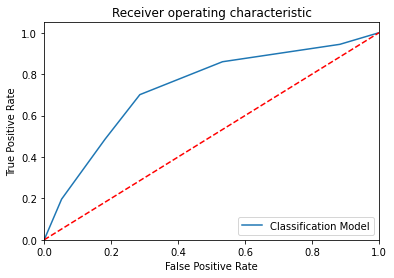

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(C=10, kernel='linear', probability=True)
Confusion matrix : 
 [[93 14]
 [10 67]]
Outcome values : 
 93 14 10 67
Classification report : 
               precision    recall  f1-score   support

           1       0.90      0.87      0.89       107
           0       0.83      0.87      0.85        77

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184

Accuracy : 87.0 %
Precision : 90.3 %
Recall : 86.9 %
F1 Score : 0.886
Specificity or True Negative Rate : 87.0 %
Balanced Accuracy : 86.9 %
roc_auc_score: 0.87


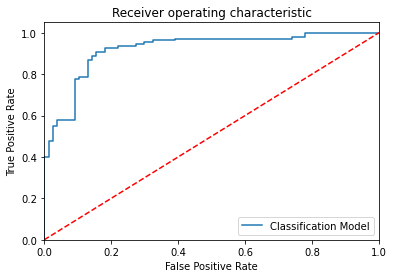

-----------------------------------------------------------------------------------------------------
Model Name:  BaggingClassifier(n_estimators=100)
Confusion matrix : 
 [[94 13]
 [12 65]]
Outcome values : 
 94 13 12 65
Classification report : 
               precision    recall  f1-score   support

           1       0.89      0.88      0.88       107
           0       0.83      0.84      0.84        77

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184

Accuracy : 86.4 %
Precision : 88.7 %
Recall : 87.9 %
F1 Score : 0.883
Specificity or True Negative Rate : 84.4 %
Balanced Accuracy : 86.1 %
roc_auc_score: 0.861


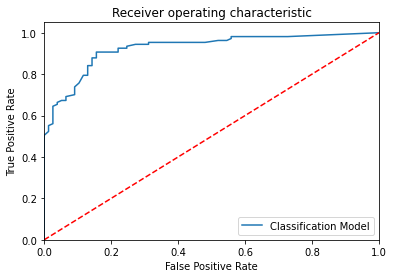

-----------------------------------------------------------------------------------------------------
Model Name:  GradientBoostingClassifier()
Confusion matrix : 
 [[94 13]
 [12 65]]
Outcome values : 
 94 13 12 65
Classification report : 
               precision    recall  f1-score   support

           1       0.89      0.88      0.88       107
           0       0.83      0.84      0.84        77

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184

Accuracy : 86.4 %
Precision : 88.7 %
Recall : 87.9 %
F1 Score : 0.883
Specificity or True Negative Rate : 84.4 %
Balanced Accuracy : 86.1 %
roc_auc_score: 0.861


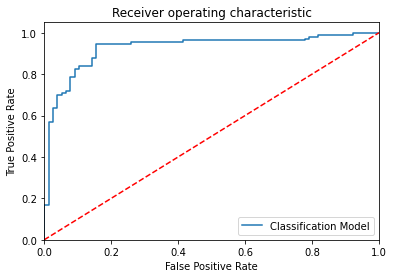

-----------------------------------------------------------------------------------------------------
Model Name:  LGBMClassifier()
Confusion matrix : 
 [[93 14]
 [13 64]]
Outcome values : 
 93 14 13 64
Classification report : 
               precision    recall  f1-score   support

           1       0.88      0.87      0.87       107
           0       0.82      0.83      0.83        77

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184

Accuracy : 85.3 %
Precision : 87.7 %
Recall : 86.9 %
F1 Score : 0.873
Specificity or True Negative Rate : 83.1 %
Balanced Accuracy : 85.0 %
roc_auc_score: 0.85


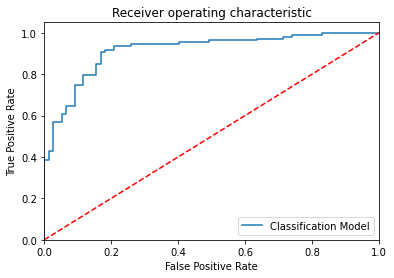

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[90 17]
 [ 9 68]]
Outcome values : 
 90 17 9 68
Classification report : 
               precision    recall  f1-score   support

           1       0.91      0.84      0.87       107
           0       0.80      0.88      0.84        77

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184

Accuracy : 85.9 %
Precision : 90.9 %
Recall : 84.1 %
F1 Score : 0.874
Specificity or True Negative Rate : 88.3 %
Balanced Accuracy : 86.2 %
roc_auc_score: 0.862


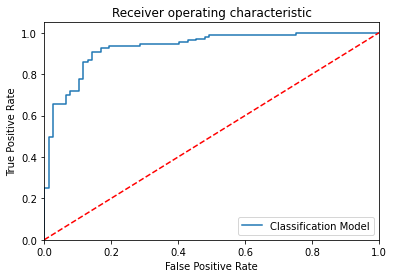

-----------------------------------------------------------------------------------------------------
Model Name:  XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Confusion matrix : 
 [[93 14]
 [11 66]]
Outcome values : 
 93 14 11 66
Classification report : 
               precision    recall  f1-score   support

           1       0.89      0.87 

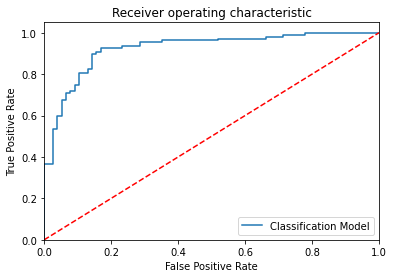

-----------------------------------------------------------------------------------------------------


In [29]:
a={'Model Name':[],'True Positive':[],'False Negative':[],'False Positive':[],'True Negative':[],'Accuracy':[],'Precision':[],'Recall':[],'F1 Score':[],'Specificity':[],'MCC':[],'ROC_AUC_Score':[],'Balanced Accuracy':[]}
result=pd.DataFrame(a)


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb
from sklearn.naive_bayes import GaussianNB
import lightgbm as lgb
from lightgbm import LGBMClassifier

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)
ModelSVM = SVC(C=10,kernel='linear',probability=True)
modelBAG = BaggingClassifier(base_estimator=None, n_estimators=100, max_samples=1.0, max_features=1.0,bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False,n_jobs=None, random_state=None, verbose=0)
ModelGB = GradientBoostingClassifier(loss='deviance', learning_rate=0.1,n_estimators=100, subsample=1.0,criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None,random_state=None,max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False,validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
ModelLGB = lgb.LGBMClassifier()
ModelGNB = GaussianNB()
ModelXGB = XGBClassifier()

MM = [ModelLR, ModelDC, ModelRF, ModelET,ModelKNN, ModelSVM, modelBAG,ModelGB, ModelLGB, ModelGNB, ModelXGB]
for models in MM:
    
    # Fit the model
    
    models.fit(X_train, y_train)
    
    # Prediction
    
    y_pred = models.predict(X_test)
    y_pred_prob = models.predict_proba(X_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
     # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred
    


    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)
    
    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    import math
    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')

 # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(X_test)[:,1])
    plt.figure()
    
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    
    plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    
    new_row = {'Model Name' : models,
               'True Positive' : tp, 
               'False Negative' : fn, 
               'False Positive' : fp,
               'True Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    result = result.append(new_row, ignore_index=True)
       

In [30]:
MM = [ModelLR, ModelDC, ModelRF, ModelET,ModelKNN, ModelSVM, modelBAG,ModelGB, ModelLGB, ModelGNB, ModelXGB]
score_test_list = []
score_train_list = []
recall_list = [] 
precision_list = []
f1Score_list = []
accuracy_list = []

for models in MM:
    score_train = models.score(X_train,y_train)
    score_test = models.score(X_test,y_test)
    score_test_list.append(score_test)
    score_train_list.append(score_train)
    
     # Fit the model
    
    models.fit(X_train, y_train)
    
    # Prediction
    
    y_pred = models.predict(X_test)
    y_pred_prob = models.predict_proba(X_test)
    
    
     # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred
    


    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)

    
    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)


    # classification report for precision, recall f1-score and accuracy


    # calculating the metrics

    recall = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    recall_list.append(recall)
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    f1Score_list.append(f1Score)

In [31]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier', 'ExtraTreesClassifier', 
              'k-Nearest Neighbors', 'Support Vector Classifier', 'Bagging Classifier', 'Gradient Boosting Classifier',
              'Light GBM', 'Gaussian NB', 'XGboost'
             ],
    
    'Score_train': [score_train_list[0], score_train_list[1], score_train_list[2], score_train_list[3], score_train_list[4], score_train_list[5], score_train_list[6], score_train_list[7], score_train_list[8], score_train_list[9],score_train_list[10] 
                   ],
    'Score_test': [score_test_list[0], score_test_list[1], score_test_list[2], score_test_list[3], score_test_list[4], score_test_list[5], score_test_list[6], score_test_list[7], score_test_list[8], score_test_list[9],score_test_list[10]  
                   ],
    'Recall': [recall_list[0], recall_list[1], recall_list[2], recall_list[3], recall_list[4], recall_list[5], recall_list[6], recall_list[7], recall_list[8], recall_list[9],recall_list[10] 
                   ],               

    'Precision': [precision_list[0], precision_list[1], precision_list[2], precision_list[3], precision_list[4], precision_list[5], precision_list[6], precision_list[7], precision_list[8], precision_list[9],precision_list[10] 
                   ], 

    'F1 Score': [f1Score_list[0], f1Score_list[1], f1Score_list[2], f1Score_list[3], f1Score_list[4], f1Score_list[5], f1Score_list[6], f1Score_list[7], f1Score_list[8], f1Score_list[9],f1Score_list[10] 
                   ], 

})


In [32]:
models.sort_values(by=['Score_train', 'Score_test'], ascending=False)

,Model,Score_train,Score_test,Recall,Precision,F1 Score
2,Random Forest Classifier,1.000000,0.864130,0.869,0.894,0.882
6,Bagging Classifier,1.000000,0.864130,0.869,0.894,0.882
10,XGboost,1.000000,0.864130,0.869,0.894,0.882
8,Light GBM,1.000000,0.853261,0.869,0.877,0.873
3,ExtraTreesClassifier,1.000000,0.847826,0.869,0.894,0.882
1,Decision Tree Classifier,1.000000,0.842391,0.860,0.860,0.860
7,Gradient Boosting Classifier,0.938692,0.864130,0.879,0.887,0.883
5,Support Vector Classifier,0.878747,0.869565,0.869,0.903,0.886
0,Logistic Regression,0.876022,0.853261,0.850,0.892,0.871
9,Gaussian NB,0.865123,0.858696,0.841,0.909,0.874


In [33]:
models['Score_diff'] = abs(models['Score_train'] - models['Score_test'])
models.sort_values(by=['Score_diff'], ascending=True)

,Model,Score_train,Score_test,Recall,Precision,F1 Score,Score_diff
9,Gaussian NB,0.865123,0.858696,0.841,0.909,0.874,0.006427
5,Support Vector Classifier,0.878747,0.869565,0.869,0.903,0.886,0.009181
0,Logistic Regression,0.876022,0.853261,0.850,0.892,0.871,0.022761
7,Gradient Boosting Classifier,0.938692,0.864130,0.879,0.887,0.883,0.074562
4,k-Nearest Neighbors,0.795640,0.706522,0.701,0.773,0.735,0.089119
2,Random Forest Classifier,1.000000,0.864130,0.869,0.894,0.882,0.135870
6,Bagging Classifier,1.000000,0.864130,0.869,0.894,0.882,0.135870
10,XGboost,1.000000,0.864130,0.869,0.894,0.882,0.135870
8,Light GBM,1.000000,0.853261,0.869,0.877,0.873,0.146739
3,ExtraTreesClassifier,1.000000,0.847826,0.869,0.894,0.882,0.152174


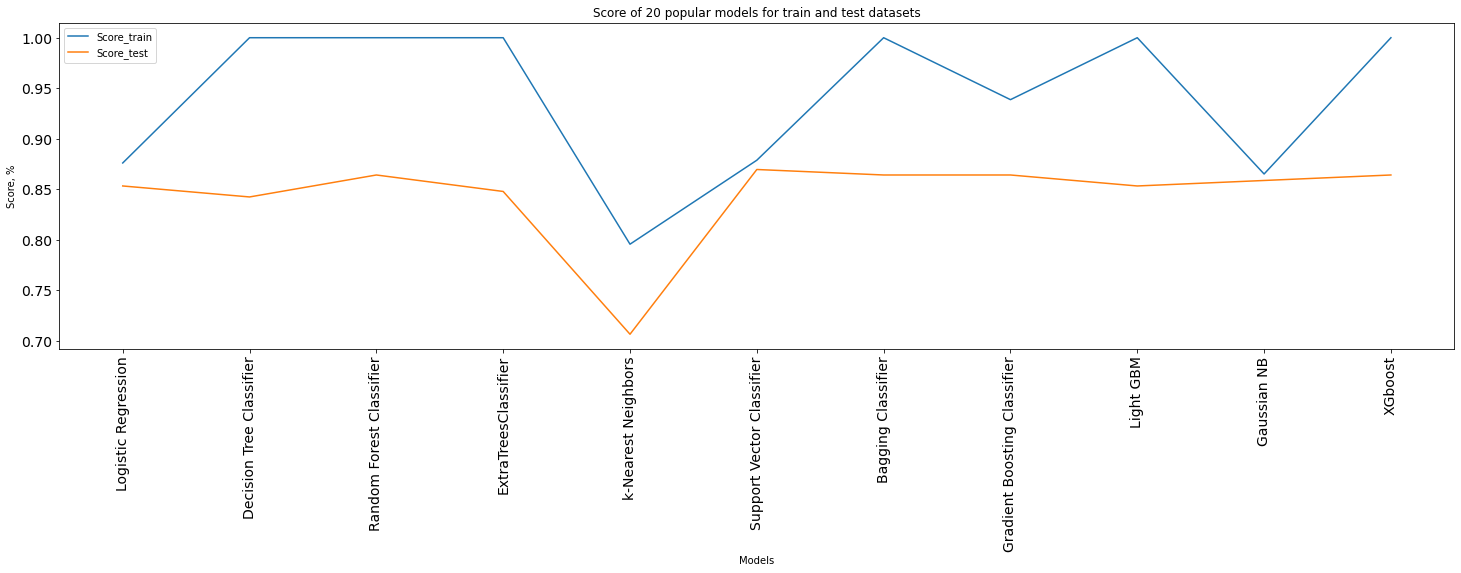

In [34]:
# Plot
plt.figure(figsize=[25,6])
xx = models['Model']
plt.tick_params(labelsize=14)
plt.plot(xx, models['Score_train'], label = 'Score_train')
plt.plot(xx, models['Score_test'], label = 'Score_test')
plt.legend()
plt.title('Score of 20 popular models for train and test datasets')
plt.xlabel('Models')
plt.ylabel('Score, %')
plt.xticks(xx, rotation='vertical')
plt.savefig('graph.png')
plt.show()

### Hyper parameter tuning to find out best model 

In [35]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [0.1,1,10],
            'gamma': [10, 1, 0.1],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
               'n_estimators': [100, 500],
               'max_features': ['auto', 'sqrt', 'log2'],
               'max_depth' : [4,5,8],
               'min_samples_leaf': [4, 8],
               'min_samples_split': [5,10],
               'criterion' :['gini', 'entropy']

            
        }
    }     
}

In [36]:
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd
scores = []

for model_name, mp in model_params.items():
    clf =  RandomizedSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False,n_iter=5)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.870553,"{'kernel': 'linear', 'gamma': 10, 'C': 10}"
1,random_forest,0.869192,"{'n_estimators': 100, 'min_samples_split': 5, ..."


In [37]:
sv = SVC(kernel ='linear', gamma= 0.1, C=10)
sv.fit(X_train,y_train)
prediction_svm = sv.predict(X_test)
sv.score(X_test,y_test)
print("SVM accuracy: {} ".format(sv.score(X_test,y_test)))
print("")
print("Confusion_matrix:")
print("")
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,prediction_svm))
print("")
print(classification_report(y_test,prediction_svm))

SVM accuracy: 0.8695652173913043 

Confusion_matrix:

[[67 10]
 [14 93]]

              precision    recall  f1-score   support

           0       0.83      0.87      0.85        77
           1       0.90      0.87      0.89       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



In [39]:
### Create a Pickle file using serialization, SVM model is used.
import pickle
pickle_out = open("sv.pkl","wb")
pickle.dump(sv, pickle_out)
pickle_out.close()